In [1]:
%matplotlib inline


# Reading and plotting XRS data
Purpose:
   Python example of netcdf and plot commands for use with GOES-R EXIS files


In [1]:
import netCDF4 as nc
import numpy as np
import cftime
import matplotlib.pyplot as plt
from datetime import datetime
import os
import requests

num_vars = 2
make_plot = 1

- Relevant data files can be downloaded [here](https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/06/)_.
  To run this code, it may be necessary to update the filename version string (“v2-1-0”) to match available files.
- Other data links and information about EXIS data can be found [here](https://www.ngdc.noaa.gov/stp/satellite/goes-r.html)_



In [2]:
dir0 = "./"
file0 = "sci_xrsf-l2-flsum_g16_s20170209_e20240218_v2-2-0.nc"

# Download `file0` if it does not exist locally
if not os.path.exists(dir0 + file0):
    with open(dir0 + file0, "wb") as f:
        url_path = "https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-flsum_science/"
        r = requests.get(url_path + file0)
        f.write(r.content)

Open netcdf file for reading data



In [3]:
# filepath='/Users/anilareddy/Downloads/sci_xrsf-l2-flsum_g18_s20220905_e20240210_v2-2-0.nc'
# file0="sci_xrsf-l2-flsum_g18_s20220905_e20240210_v2-2-0.nc"

In [4]:
# ff = nc.Dataset(filepath)

In [5]:
# with nc.Dataset(filepath, 'r') as ff:
#     # Now you can access and work with the contents of the NetCDF file using the 'ff' object
#     # For example, you can print the dimensions, variables, or attributes of the NetCDF file
#     print("Dimensions:", ff.dimensions)
#     print('')
#     print("Variables:", ff.variables)
#     print('')
#     print("Attributes:", ff.ncattrs())

This netCDF dataset contains solar flare information, focusing on various variables recorded over time. The 'xrsb_flux' variable represents the averaged flux for XRS-B in units of W/m². The 'status' variable is a flag associated with 'xrsb_flux,' indicating events such as the start, peak, decline, and post-event phases of a solar flare. Time-related data is stored in the 'time' variable, represented in seconds since January 1, 2000. Other variables include 'background_flux' (background flux recorded at the start of a flare), 'flare_class' (class of flare recorded at the peak), 'integrated_flux' (integrated flux since the start of an event), and 'flare_id' (unique identifier for a flare detection based on the time of the event). The dataset attributes provide additional metadata, including information about the dataset's conventions, title, keywords, and more.

In [6]:
ff = nc.Dataset(dir0 + file0)

In [7]:
# with nc.Dataset(dir0 + file0, 'r') as ff:
    # Choose a variable from the file, e.g., assuming 'data_variable' is the variable you are interested in
data_variable = ff.variables['status']

# Get the dimensions of the variable
dimensions = data_variable.dimensions

# Find the size of the first dimension (assuming it represents rows)
num_rows = len(ff.dimensions[dimensions[0]])

# Print the number of rows
print(f"The file has {num_rows} rows of data.")

The file has 36756 rows of data.


In [8]:
data_variable = ff.variables['status']

# Check the values of the 'status' variable to identify the peak event
peak_event_rows = [i for i, value in enumerate(data_variable[:]) if value == 'EVENT_PEAK']

# Get the dimensions of the variable
dimensions = data_variable.dimensions

# Find the size of the first dimension (assuming it represents rows)
num_rows = len(ff.dimensions[dimensions[0]])

# Print the number of rows with the status event peak
print(f"The file has {len(peak_event_rows)} rows with the status event peak.")


The file has 9915 rows with the status event peak.


Time conversion



In [9]:
# from netCDF4 import num2date
# with nc.Dataset(filepath, 'r') as ff:
#     time_var = ff.variables["time"]
#     time_data = time_var[:]
#     time_units = time_var.units

#     # Convert the numeric time values to Python datetime objects using netCDF4
#     datetime0 = num2date(time_data, time_units)

# print("Start time in file [{}]: {:.0f} seconds since 2000-01-01 12:00:00".format(time_units, time_data[0]))
# print("End time in file [{}]: {:.0f} seconds since 2000-01-01 12:00:00".format(time_units, time_data[-1]))

In [10]:
datetime0 = cftime.num2pydate(ff.variables["time"][:], ff["time"].units)
print("Filename:  ", file0)
print("start time in file [{}]: {}".format(ff["time"].units, ff.variables["time"][0]))
print("start and end times:", datetime0[0], datetime0[-1])

Filename:   sci_xrsf-l2-flsum_g16_s20170209_e20240218_v2-2-0.nc
start time in file [seconds since 2000-01-01 12:00:00]: 539872860.0
start and end times: 2017-02-09 00:41:00 2024-02-18 23:56:00


In [11]:
print("start and end times:", datetime0[0], datetime0[-1])

start and end times: 2017-02-09 00:41:00 2024-02-18 23:56:00


In [12]:
print("start and end times:", datetime0[:50])

start and end times: [real_datetime(2017, 2, 9, 0, 41) real_datetime(2017, 2, 9, 0, 50)
 real_datetime(2017, 2, 9, 0, 57) real_datetime(2017, 2, 9, 1, 13)
 real_datetime(2017, 2, 9, 1, 30) real_datetime(2017, 2, 9, 1, 40)
 real_datetime(2017, 2, 9, 1, 44) real_datetime(2017, 2, 9, 1, 45)
 real_datetime(2017, 2, 9, 1, 51) real_datetime(2017, 2, 9, 1, 56)
 real_datetime(2017, 2, 9, 2, 31) real_datetime(2017, 2, 9, 2, 40)
 real_datetime(2017, 2, 9, 2, 49) real_datetime(2017, 2, 9, 2, 55)
 real_datetime(2017, 2, 9, 2, 55) real_datetime(2017, 2, 9, 2, 59)
 real_datetime(2017, 2, 9, 3, 3) real_datetime(2017, 2, 9, 3, 9)
 real_datetime(2017, 2, 9, 3, 16) real_datetime(2017, 2, 9, 3, 21)
 real_datetime(2017, 2, 9, 3, 26) real_datetime(2017, 2, 9, 3, 30)
 real_datetime(2017, 2, 9, 3, 41) real_datetime(2017, 2, 9, 5, 26)
 real_datetime(2017, 2, 9, 5, 42) real_datetime(2017, 2, 9, 5, 50)
 real_datetime(2017, 2, 9, 6, 3) real_datetime(2017, 2, 9, 6, 12)
 real_datetime(2017, 2, 9, 6, 16) real_datet

In [13]:
print(f"The file has {num_rows} rows of data.")

The file has 36756 rows of data.


Print some variable names and values



In [14]:
for ii in np.arange(num_vars):
    var = list(ff.variables.keys())[ii]
    val = ff.variables[var][:]
#     print("{}[0]: {:8g}".format(var, val[0]))
    # Check if the variable is a string type
    if isinstance(val[0], str):
        print("{}[0]: {:<s}".format(var, val[0]))
    else:
        print("{}[0]: {:8g}".format(var, val[0]))

xrsb_flux[0]: 1.11465e-07
status[0]: EVENT_START


Print a global attribute



In [15]:
platform = getattr(ff, "platform")
print("satellite: ", platform)

satellite:  g16


Print all variable names



In [16]:
print("\nAll variable names")
print(list(ff.variables.keys()), "\n")


All variable names
['xrsb_flux', 'status', 'time', 'background_flux', 'flare_class', 'integrated_flux', 'flare_id'] 



In [17]:
with nc.Dataset(dir0 + file0, 'r') as ds:
    # Display variable names
    print("Variable Names:")
    print(ds.variables.keys())

    # Display the first 10 rows of each variable (you might need to adjust the variable names)
    print("\nFirst 10 rows of Variables:")
    for var_name, var in ds.variables.items():
        print(f"\nVariable: {var_name}")
        print(var[:10])

Variable Names:
dict_keys(['xrsb_flux', 'status', 'time', 'background_flux', 'flare_class', 'integrated_flux', 'flare_id'])

First 10 rows of Variables:

Variable: xrsb_flux
[1.1146541e-07 3.8009338e-07 2.3251106e-07 1.1515114e-07 9.8932944e-08
 4.3950894e-07 1.4835997e-07 1.3171240e-07 1.7020639e-06 7.5962191e-07]

Variable: status
['EVENT_START' 'EVENT_PEAK' 'EVENT_END' 'POST_EVENT' 'EVENT_START'
 'EVENT_PEAK' 'EVENT_END' 'EVENT_START' 'EVENT_PEAK' 'EVENT_END']

Variable: time
[5.3987286e+08 5.3987340e+08 5.3987382e+08 5.3987478e+08 5.3987580e+08
 5.3987640e+08 5.3987664e+08 5.3987670e+08 5.3987706e+08 5.3987736e+08]

Variable: background_flux
[1.1591767901109051e-07 1.1591767901109051e-07 1.1591767901109051e-07 --
 1.0725744914452662e-07 1.0725744914452662e-07 1.0725744914452662e-07
 1.7688651610114903e-07 1.7688651610114903e-07 1.7688651610114903e-07]

Variable: flare_class
['' 'B3.8' '' '' '' 'B4.3' '' '' 'C1.7' '']

Variable: integrated_flux
[5.558239354286343e-05 0.0001947354176

Plot 1 day of XRS data



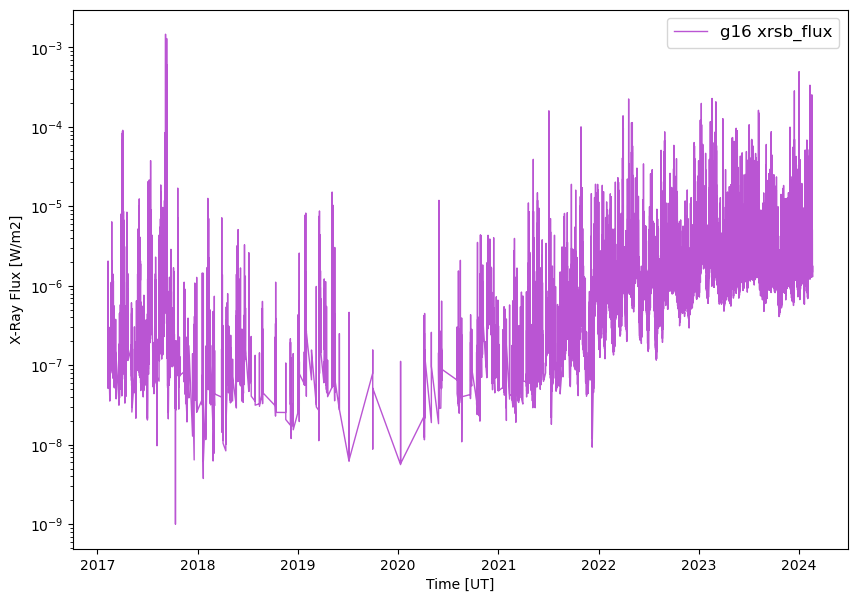

In [18]:
var_name = ["xrsb_flux"]
if make_plot:
    chan_color = ["mediumorchid", "green", "darkviolet", "indigo", "b",
                  "darkcyan", "greenyellow", "yellow", "gold", "orange",
                  "orangered", "darkred"][:num_vars]
    
    plt.figure(0, figsize=[10, 7])
    
    plt.plot(
        datetime0[:],
        ff.variables[var_name[0]][:],
        linewidth=1,
        color=chan_color[0],  # Assuming num_vars is 1
        label="{} {}".format(platform, var_name[0]),
    )    
    plt.yscale("log")
    plt.legend(loc="upper right", prop={"size": 12})
    plt.xlabel("Time [UT]")
    plt.ylabel("X-Ray Flux [{}]".format(ff.variables[var_name[0]].units))
    plt.show()

In [19]:
import pandas as pd

In [20]:
with nc.Dataset(dir0 + file0, 'r') as ff:
    # Create an empty dictionary to store data
    data_dict = {}

    # Iterate over all variables in the file
    for variable_name, variable in ff.variables.items():
        # Get the data for each variable
        data_dict[variable_name] = variable[:]

# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(data_dict)

# Save the DataFrame to a CSV file
csv_filename = "output.csv"
df.to_csv(csv_filename, index=False)

# Print the DataFrame
print(df.head())

      xrsb_flux       status         time  background_flux flare_class  \
0  1.114654e-07  EVENT_START  539872860.0     1.159177e-07               
1  3.800934e-07   EVENT_PEAK  539873400.0     1.159177e-07        B3.8   
2  2.325111e-07    EVENT_END  539873820.0     1.159177e-07               
3  1.151511e-07   POST_EVENT  539874780.0              NaN               
4  9.893294e-08  EVENT_START  539875800.0     1.072574e-07               

   integrated_flux      flare_id  
0         0.000056  201702090041  
1         0.000195  201702090041  
2         0.000254  201702090041  
3              NaN  201702090041  
4         0.000067  201702090130  


In [21]:
# Add the datetime column to the DataFrame
df['datetime'] = datetime0

# Save the DataFrame to a CSV file
csv_filename = "output.csv"
df.to_csv(csv_filename, index=False)

In [22]:
df.head()

,xrsb_flux,status,time,background_flux,flare_class,integrated_flux,flare_id,datetime
0,1.114654e-07,EVENT_START,539872860.0,1.159177e-07,,0.000056,201702090041,2017-02-09 00:41:00
1,3.800934e-07,EVENT_PEAK,539873400.0,1.159177e-07,B3.8,0.000195,201702090041,2017-02-09 00:50:00
2,2.325111e-07,EVENT_END,539873820.0,1.159177e-07,,0.000254,201702090041,2017-02-09 00:57:00
3,1.151511e-07,POST_EVENT,539874780.0,NaN,,NaN,201702090041,2017-02-09 01:13:00
4,9.893294e-08,EVENT_START,539875800.0,1.072574e-07,,0.000067,201702090130,2017-02-09 01:30:00


In [23]:
# Create a new DataFrame with only "EVENT_PEAK" status
df_peak = df[df['status'] == 'EVENT_PEAK'].copy()

# Remove the "flare_status" column from the new DataFrame
df_peak.drop(columns=['status', 'flare_id'], inplace=True)

# Display the new DataFrame
print(df_peak)

          xrsb_flux         time  background_flux flare_class  \
1      3.800934e-07  539873400.0     1.159177e-07        B3.8   
5      4.395089e-07  539876400.0     1.072574e-07        B4.3   
8      1.702064e-06  539877060.0     1.768865e-07        C1.7   
11     3.296319e-07  539880000.0     2.076109e-07        B3.2   
15     3.911416e-07  539881140.0     1.970752e-07        B3.9   
...             ...          ...              ...         ...   
36741  5.076468e-06  761501100.0     2.278236e-06        C5.0   
36743  4.665297e-06  761502060.0     4.300563e-06        C4.6   
36747  2.619681e-06  761530080.0     1.507425e-06        C2.6   
36751  1.739972e-06  761571240.0     1.270661e-06        C1.7   
36753  1.788331e-06  761572260.0     1.531539e-06        C1.7   

       integrated_flux            datetime  
1             0.000195 2017-02-09 00:50:00  
5             0.000160 2017-02-09 01:40:00  
8             0.000546 2017-02-09 01:51:00  
11            0.000216 2017-02-09 02:40

In [24]:
csv_filename = "peaks.csv"
df_peak.to_csv(csv_filename, index=False)

## **Plot the flare frequency vs peak flux**

In [42]:
#This plot will tell us the number of flares in each "bin" over 6 years 
n_bins =  30

bin_edge = np.geomspace(1e-8, 9e-3, n_bins+1) # Define bin edges logarithmically spaced apart

# Split peak irradiances into x number of bins
# the variable hist contains the total # of flares in each bin
# bin_edges contains the edge irradiance values of each of the bins
hist, bin_edges = np.histogram(df_peak['xrsb_flux'], bins=bin_edge)

# Let's also calculate some properties of the histogram bins which we will use later

# Calculate bin widths from the bin edges
bin_widths = np.diff(bin_edges)

# Calculate bin centers from bin edges 
bin_centers = bin_edges[:-1] + np.diff(bin_edges)/2


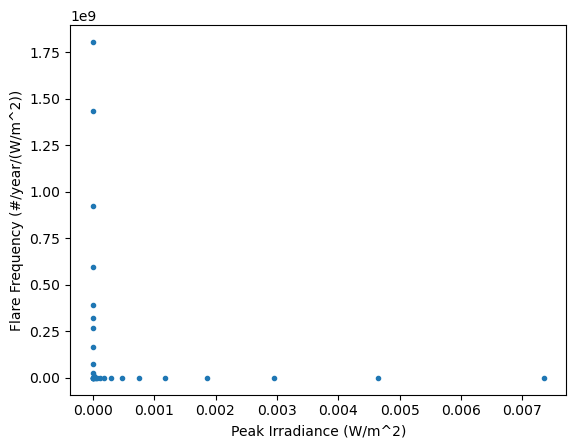

In [43]:
# Two adjustments to the data

#Calculate for a single year instead of 6 years
num_flares_per_year = hist/6

# Calculate the number of flares over 6 years per bin width
num_flares_per_year_per_binwidth = num_flares_per_year/bin_widths

# Plot
plt.plot(bin_centers, num_flares_per_year_per_binwidth, '.')
plt.xlabel('Peak Irradiance (W/m^2)')
plt.ylabel('Flare Frequency (#/year/(W/m^2))')

plt.show()

In [ ]:
# Assuming you have already calculated hist, bin_edges, bin_widths, and bin_centers

# Calculate for a single year instead of 6 years
num_flares_per_year = hist / 6

# Calculate the number of flares over 6 years per bin width
num_flares_per_year_per_binwidth = num_flares_per_year / bin_widths

# Plot the histogram on log-log scale
plt.bar(bin_centers, num_flares_per_year_per_binwidth, width=bin_widths, edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Peak Irradiance (W/m^2)')
plt.ylabel('Flare Frequency (#/year/(W/m^2))')
plt.show()


# log plotting and cleaning the data

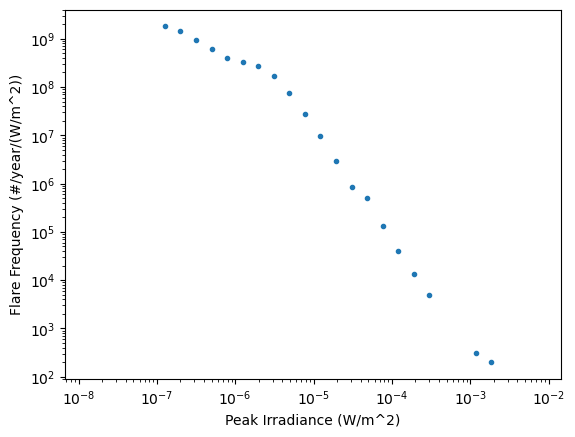

In [46]:
import matplotlib.pyplot as plt

plt.plot(bin_centers, num_flares_per_year_per_binwidth, '.')
plt.xlabel('Peak Irradiance (W/m^2)')
plt.ylabel('Flare Frequency (#/year/(W/m^2))')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [47]:
display(num_flares_per_year_per_binwidth)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.80646295e+09, 1.43486190e+09, 9.26128816e+08,
       5.98295207e+08, 3.91062270e+08, 3.22103791e+08, 2.67906800e+08,
       1.66526524e+08, 7.36724052e+07, 2.76820966e+07, 9.46130375e+06,
       2.93773807e+06, 8.51030119e+05, 4.92665459e+05, 1.31601595e+05,
       4.01204682e+04, 1.36787348e+04, 4.94917865e+03, 0.00000000e+00,
       0.00000000e+00, 3.14086224e+02, 1.98872227e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

There are 0's in the data and since we will be taking log of the data, we need to remove them

In [48]:
import numpy as np

# Assuming num_flares_per_year_per_binwidth is your array
num_flares_per_year_per_binwidth = num_flares_per_year_per_binwidth[num_flares_per_year_per_binwidth != 0]

# Display the array without zeros
print(num_flares_per_year_per_binwidth)


[1.80646295e+09 1.43486190e+09 9.26128816e+08 5.98295207e+08
 3.91062270e+08 3.22103791e+08 2.67906800e+08 1.66526524e+08
 7.36724052e+07 2.76820966e+07 9.46130375e+06 2.93773807e+06
 8.51030119e+05 4.92665459e+05 1.31601595e+05 4.01204682e+04
 1.36787348e+04 4.94917865e+03 3.14086224e+02 1.98872227e+02]


In [45]:
import numpy as np

# List of the indices where # of flares per bin width is zero
index_of_zeros = np.where(num_flares_per_year_per_binwidth == 0)

# Delete the elements in bin_centers and num_of_flares_per_binwidth based on the
#  list of indices where um_of_flares_per_binwidth has a zero value
num_flares_per_year_per_binwidth = np.delete(num_flares_per_year_per_binwidth, index_of_zeros)
bin_centers = np.delete(bin_centers, index_of_zeros)
bin_edges = np.delete(bin_edges, index_of_zeros[0]+1)

display(num_flares_per_year_per_binwidth)

array([1.80646295e+09, 1.43486190e+09, 9.26128816e+08, 5.98295207e+08,
       3.91062270e+08, 3.22103791e+08, 2.67906800e+08, 1.66526524e+08,
       7.36724052e+07, 2.76820966e+07, 9.46130375e+06, 2.93773807e+06,
       8.51030119e+05, 4.92665459e+05, 1.31601595e+05, 4.01204682e+04,
       1.36787348e+04, 4.94917865e+03, 3.14086224e+02, 1.98872227e+02])

# Finding the power law

In [46]:
import numpy as np
import scipy.stats as stats

# Linear regression

We now can find a power law by fitting the linear region shown on the log-log plot. To find the power-law relationship, we will also need to fit the line to the **log of the data** rather than to the raw data itself.

In [47]:

## Define the x and y data for the linear regression
x =  np.log(bin_centers[11:29])   
y =  np.log(num_flares_per_year_per_binwidth[11:29])  

PI2F_slope, PI2F_intercept, PI2F_r_value, PI2F_p_value, PI2F_std_err = stats.linregress(x, y)

display(PI2F_slope, PI2F_intercept, PI2F_r_value, PI2F_p_value, PI2F_std_err)

-2.1570006270741704

-8.685280633081073

-0.9969966753529202

4.873895883028732e-09

0.06332823035732356

Now, let's calcuate the best fit curve for the original data by "undoing" the log:

In [48]:
import numpy as np

## Calculate the best fit line using the slope and intercept given by the linear 
## regression function above.   
PI2F_best_fit_line = np.exp(PI2F_slope*np.log(bin_centers[11:29])+PI2F_intercept)


 Plot the `num_flares_per_year_per_binwidth` data versus `bin_centers` along with the best fit curve to visualize the fit. We suggest plotting in log-log scale, which will make both the data and the best-fit curve appear linear.

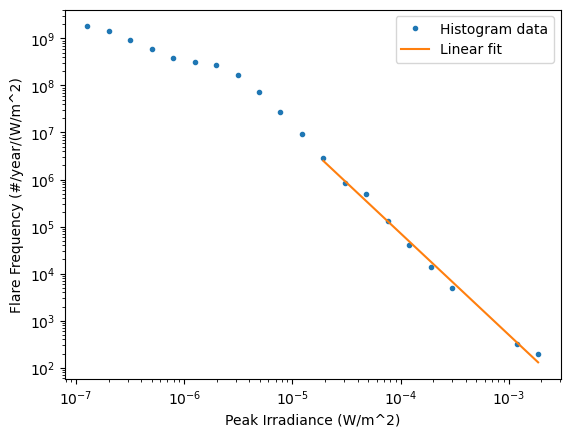

In [49]:
import matplotlib.pyplot as plt

## Plot the bin_centers versus flare_per_year_per_binwidth data and the best fit  
## line on the same graph to visualize the fit. Note, that we need to take the  
## exponential of the linear fit in order to translate it to a power law fit. 

plt.plot(bin_centers, num_flares_per_year_per_binwidth, '.')
plt.plot(bin_centers[11:29], PI2F_best_fit_line)#note the bin range here
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Peak Irradiance (W/m^2)')
plt.ylabel('Flare Frequency (#/year/(W/m^2)')
plt.legend(['Histogram data', 'Linear fit'])

plt.show()

# Maximum Likelihood Estimate

In [50]:
def calculate_alpha_and_sigma_with_mle(x, x_min):
  n = len(x)
  alpha = 1 + n / np.sum(np.log(x/x_min))
  sigma = ((alpha - 1) / np.sqrt(n)) + (1/n)
  return alpha, sigma

In [51]:
data = df_peak['xrsb_flux']
x_min = 3.5e-6
indices = np.where(data > x_min)
alpha_peaks, sigma_peaks = calculate_alpha_and_sigma_with_mle(data.iloc[indices], x_min)
print(alpha_peaks, '±', sigma_peaks)

2.3121013631071925 ± 0.026972551731566163


# Powerlaw package

In [52]:
pip install powerlaw


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Users/anilareddy/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [55]:
import powerlaw
data = df_peak['xrsb_flux'].values
results = powerlaw.Fit(data)
print(results.power_law.alpha, '±', results.power_law.sigma)
print(results.power_law.xmin)

Calculating best minimal value for power law fit
2.3680986707853693 ± 0.03210402603003846
4.504964635998476e-06


# Comapring 3 Methods

In [56]:
print('Linear fit:', PI2F_slope, '±', PI2F_std_err)
print("D'Huys+ 2016 equations:", alpha_peaks, '±', sigma_peaks)
print('`powerlaw` package', results.power_law.alpha, '±', results.power_law.sigma)

Linear fit: -2.1570006270741704 ± 0.06332823035732356
D'Huys+ 2016 equations: 2.3121013631071925 ± 0.026972551731566163
`powerlaw` package 2.3680986707853693 ± 0.03210402603003846
